In [1]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


In [3]:
gff = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/gff.tsv', sep='\t')# данный файл имеет биоинформатическое расширение
# импортируем его через новую переменную, указав путь к файлу# после чего поставим разделитель tab

In [5]:
gff.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [6]:
gff.iloc[1].attributes
# здесь вызовем метод iloc который позволяет # индексировать наши данные только при помощи числовых индексов
# в данном случае, мы взяли строку с индексом 1# и обратились к колонки attributes

'Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,'

In [7]:
pattern = r'Parent=(.+\d)'
# здесь мы говорим о том, что регулярное выражение r'()'# должно искать выражение которое Parent=
# далее мы будем использовать так называемую группу# которая указывается в круглых скобках, внутри нашего паттерна ()
# питон поймёт, что нас интересует что-то, что записано после Parent=# и это что-то может содержать знаки
# как здесь - написанно что нас интересуют любые символы которые идут# после Parent= и в любом колличестве(+), а обозначение (.) это обозначение
# любого знака а соответственно (+) говорит что знаков после Parent=# может быть любое колличество, но после этих знаков должна быть какая-то 
# цифра (\d), цифра в регулярных значениях обозначаются при помощи# обратного слэша \ и буквы d вот так -  (\d)

In [8]:
gff.attributes.str.extract(pattern)

,0
0,XM_001475631.1
1,XM_001475631.1
2,XM_001475631.1
3,XM_001475631.1
4,XM_001475631.1
...,...
507,XM_001475631.1
508,XM_001475631.1
509,XM_001475631.1
510,XM_001475631.1


In [9]:
pattern = r'Parent=(?P<parent>[\w\.]+)'
# мы можем использовать метод, в котором мы ищем подстроки 
# где зададим переменную, в которую положим паттерн, который апперирует группами (?<parent>[\w\.]+) 
# а во вторых - это так называемая именованная группа, мы так же применяем круглые скобки () 
# и хотим выделить только то, что будет идти после Parent= и до других частей нашего текста 
# именованая группа подразумевает наличие названия ?P<parent> 
# но здесь обозначено в виде ?P<> и скобочек в которых обозначено название группы 
# далее указан паттерн немного видоизменённый, по отношению к тому, что мы делали ранее [\w\.]+ 
# что здесь указанно?  
# обозначение \w (слэш w) обозначает что мы ищем какую-то букву 
# далее \. обозначает что мы ищем какой-то знак с обратным слеш перед ним 
# ранее мы видели что точка может обозначать какой-то символ, впринципе любой но здесь 
# перед ней стоит обратный слэш .\ и это обозначает что когда мы ищем какую-то букву w\ 
# после неё мы хотим увидеть точку \. и мы можем увидеть что мы обернули некоторый  
# кусочек кода в квадратные скобки [\w\.] - квадратные скобки обозначают обциональность 
# это означает что мы можем из любых символов внутри наших квадратных скобок выбирать 
# какие-то. Можно сказать что после Parent= хотелось бы видеть какие-то символы [\w не любые 
# скажем так - буквы или цифры, обозначаемые \w либо точку \.] и эти точки, либо буквеные 
# либо символы в виде цифр мы хотим видеть в неограниченном колличестве +)

In [12]:
parent = gff.attributes.str.extract(pattern)

In [13]:
parent

,parent
0,XM_001475631.1
1,XM_001475631.1
2,XM_001475631.1
3,XM_001475631.1
4,XM_001475631.1
...,...
507,XM_001475631.1
508,XM_001475631.1
509,XM_001475631.1
510,XM_001475631.1


In [14]:
parent.parent.value_counts()

XM_001475631.1    479
NC_000083.5        33
Name: parent, dtype: int64

In [15]:
gff.type.value_counts()

exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: type, dtype: int64

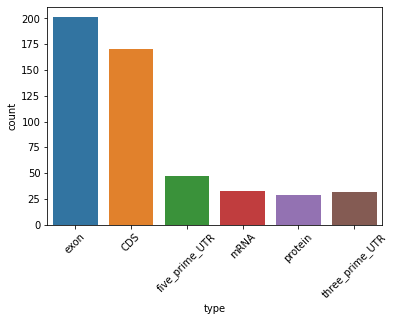

In [19]:
fig, ax = plt.subplots()
sns.countplot(data=gff, x='type', ax=ax)
ax.tick_params(axis='x', rotation=45)
# построим график# обозначим что это фигура fig и вызовем subplots что бы далее
# нам было удобно модифицировать фид нашего графика# после чего обозначим что строим на основе seraborn countplot
# в который передадим в data датафрейм, в ось x передадим колонку type
# после чего проведём небольшую настройку нашего плота
# где укажем в tick_params по оси x нужно зазвернуть надписи на 45 градусов
# где обозначим по какой оси это axis = 'x' и на какой градус rotation=45